In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



import tensorflow as tf
import keras

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


IMAGE_SIZE = 96
CLASSES = 30

# Źródła 
# https://www.kaggle.com/drgilermo/face-images-with-marked-landmark-points?select=facial_keypoints.csv
# https://www.kaggle.com/alincijov/cnn-facial-keypoints
# https://www.kaggle.com/richardarendsen/face-landmarks-with-cnn

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6352512316772158046
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11357673422212415508
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


# Load data

In [ ]:
base_path = "/content/drive/MyDrive/keypoints_detection/"

In [ ]:
df = pd.read_csv(base_path + 'facial_keypoints.csv')
df.head()
images = np.load(base_path + 'face_images.npz')['face_images']

In [ ]:
print("Liczebność zbioru przed usunięciem braków", len(df))

Liczebność zbioru przed usunięciem braków 7049


In [ ]:
df_na = df
df = df.dropna()
indexes = df_na.index.isin(df.index)

In [ ]:
print("Liczebność zbioru po usunięciu braków:" , len(df))

Liczebność zbioru po usunięciu braków: 2140


In [ ]:
df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

# Make keypoints and images arrays

In [ ]:
def make_keypoints_array(df):
  c = 0
  columns = {}
  temp = []
  for i, e in enumerate(list(df.columns)):
    temp.append(e)
    c += 1
    if c == 2:
      columns[e.split('_y')[0]] = temp
      temp = []
      c = 0
  keypoints_dict = {}
  for k in columns.keys():
    keypoints_dict[k] = df[columns[k]].values
  keypoints = np.array(list(keypoints_dict.values()))
  keypoints = np.swapaxes(keypoints, 0, 1)
  return keypoints


def make_images_array(images):
  images = np.swapaxes(np.swapaxes(images, 1, 2), 0, 1)
  return images

In [ ]:
keypoints = make_keypoints_array(df)
images = make_images_array(images)

In [ ]:
images

array([[[238., 236., 237., ..., 250., 250., 250.],
        [235., 238., 236., ..., 249., 250., 251.],
        [237., 236., 237., ..., 251., 251., 250.],
        ...,
        [186., 183., 181., ...,  52.,  57.,  60.],
        [189., 188., 207., ...,  61.,  69.,  78.],
        [191., 184., 184., ...,  70.,  75.,  90.]],

       [[219., 215., 204., ...,  92.,  88.,  84.],
        [222., 219., 220., ...,  92.,  88.,  86.],
        [231., 224., 212., ...,  77.,  80.,  84.],
        ...,
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.]],

       [[144., 142., 159., ..., 208., 207., 207.],
        [143., 142., 161., ..., 208., 208., 207.],
        [143., 140., 160., ..., 209., 209., 207.],
        ...,
        [ 66.,  70.,  69., ...,  81., 134., 194.],
        [ 65.,  69.,  71., ...,  75.,  83., 109.],
        [ 65.,  68.,  70., ...,  78.,  78.,  77.]],

       ...,

       [[ 74.,  74.,  74

In [ ]:
def display_image_keypoints(index, features, keypoints):
    plt.imshow(features[index], cmap='gray')
    for i in range(keypoints.shape[1]):
        element = keypoints[index,i,:]
        plt.scatter(element[0],element[1],c='r',s=10)

<Figure size 432x288 with 0 Axes>

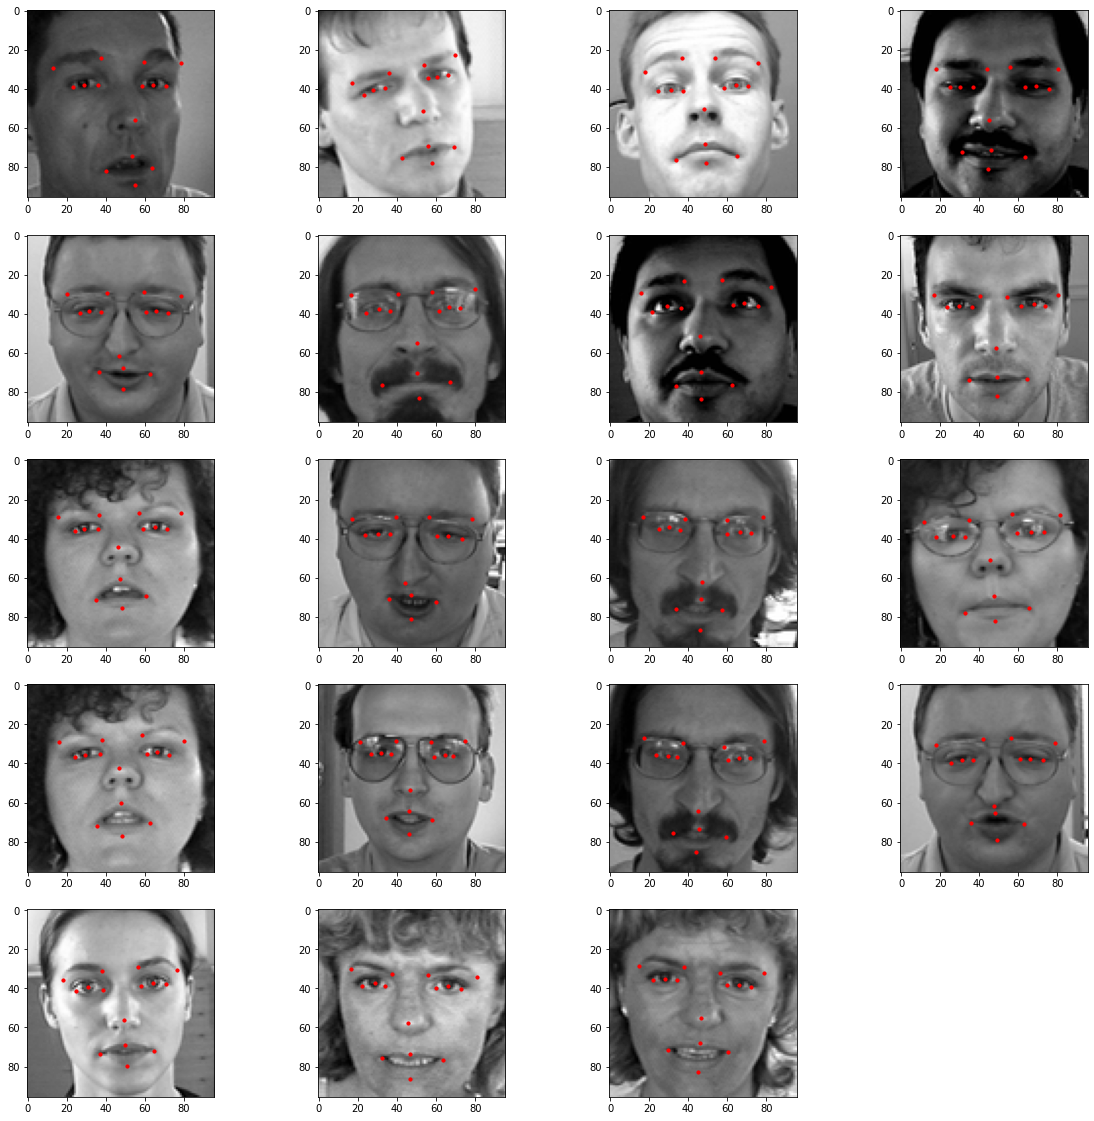

In [ ]:
plt.figure()
columns = 4
rows = 5
fig = plt.figure(figsize=(20, 20))

for i in range(1,20):
  fig.add_subplot(rows, columns, i)
  display_image_keypoints(i + 100, images, keypoints)

plt.show()

In [ ]:
images = images[indexes]

# Dividing into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, keypoints, test_size=0.4)
X_val, X_test, y_val, y_test =  train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
keypoints[0]

array([[66.03356391, 39.00227368],
       [30.22700752, 36.4216782 ],
       [59.58207519, 39.64742256],
       [73.13034586, 39.96999699],
       [36.35657143, 37.3894015 ],
       [23.45287218, 37.3894015 ],
       [56.95326316, 29.03364812],
       [80.22712782, 32.22813835],
       [40.22760902, 29.0023218 ],
       [16.35637895, 29.64747068],
       [44.42057143, 57.06680301],
       [61.19530827, 79.97016541],
       [28.61449624, 77.38899248],
       [43.3126015 , 72.93545865],
       [43.13070677, 84.48577444]])

In [ ]:
X_train_without_reshape, X_test_without_reshape, y_train_without_reshape, y_test_without_reshape = X_train, X_test, y_train, y_test

y_train = y_train.reshape(-1, 30)
X_train= X_train.reshape(len(y_train), 96, 96, 1)

y_test = y_test.reshape(-1, 30)
X_test= X_test.reshape(len(y_test), 96, 96, 1)

y_val = y_val.reshape(-1, 30)
X_val= X_val.reshape(len(y_val), 96, 96, 1)

In [ ]:
y_test[0]

array([67.24008791, 36.46786813, 29.52316484, 34.58215385, 60.63982418,
       37.64676923, 75.01925275, 37.88254945, 36.59498901, 36.70364835,
       22.68712088, 36.23208791, 59.22514286, 28.6887033 , 80.67692308,
       31.51753846, 39.89538462, 28.21714286, 16.32210989, 29.16026374,
       48.14610989, 51.55463736, 62.28975824, 73.71375824, 29.75894505,
       72.53485714, 47.43876923, 66.40562637, 46.73142857, 81.25714286])

# Creating model 1 with mobilenet

In [ ]:
BATCH_SIZE = 128
EPOCHS = 200

early_stop =  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=35, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr =  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, 
                              verbose=1, mode='auto',min_lr=10e-10)

model1 = keras.models.Sequential()
    
model1.add(keras.layers.Conv2D(3, (1,1), padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
pretrained_model = tf.keras.applications.MobileNet(include_top=False, input_tensor=None, input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3), pooling=None)

for layer in pretrained_model.layers[:30]:
    layer.trainable=False
for layer in pretrained_model.layers[30:]:
    layer.trainable=True

model1.add(pretrained_model)
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(30))


model1.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(), metrics=['mean_squared_error'])

history = model1.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test, y_test),
    shuffle=True,
    verbose=1,
    callbacks=[reduce_lr]
)

Epoch 1/200
11/11 [==============================] - 5s 263ms/step - loss: 751.4384 - mean_squared_error: 751.4384 - val_loss: 11041.0537 - val_mean_squared_error: 11041.0547 - lr: 0.0010
Epoch 2/200
11/11 [==============================] - 2s 207ms/step - loss: 23.5826 - mean_squared_error: 23.5826 - val_loss: 13031.3369 - val_mean_squared_error: 13031.3369 - lr: 0.0010
Epoch 3/200
11/11 [==============================] - 2s 206ms/step - loss: 12.2668 - mean_squared_error: 12.2668 - val_loss: 12006.4297 - val_mean_squared_error: 12006.4297 - lr: 0.0010
Epoch 4/200
11/11 [==============================] - 2s 207ms/step - loss: 9.4089 - mean_squared_error: 9.4089 - val_loss: 10627.1738 - val_mean_squared_error: 10627.1738 - lr: 0.0010
Epoch 5/200
11/11 [==============================] - 2s 206ms/step - loss: 8.0305 - mean_squared_error: 8.0305 - val_loss: 8933.5400 - val_mean_squared_error: 8933.5400 - lr: 0.0010
Epoch 6/200
11/11 [==============================] - 2s 206ms/step - loss:

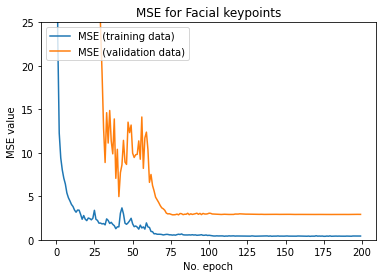

In [ ]:
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.ylim([0, 25])
plt.show()

# Creating model 2 with EfficientNet

In [ ]:
BATCH_SIZE = 128
EPOCHS = 200

early_stop =  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr =  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, 
                              verbose=1, mode='auto',min_lr=10e-10)

model2 = keras.models.Sequential()
    
model2.add(keras.layers.Conv2D(3, (1,1), padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))

pretrained_model = tf.keras.applications.EfficientNetB0(include_top=False, input_tensor=None, input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3), pooling=None)

for layer in pretrained_model.layers:
    layer.trainable=True

model2.add(pretrained_model)
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(30))


model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(), metrics=['mean_squared_error'])

history = model2.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test, y_test),
    shuffle=True,
    verbose=1,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/200
11/11 [==============================] - 17s 620ms/step - loss: 1509.0454 - mean_squared_error: 1509.0454 - val_loss: 1346.5200 - val_mean_squared_error: 1346.5200 - lr: 0.0010
Epoch 2/200
11/11 [==============================] - 5s 443ms/step - loss: 88.8986 - mean_squared_error: 88.8986 - val_loss: 1980.1466 - val_mean_squared_error: 1980.1466 - lr: 0.0010
Epoch 3/200
11/11 [==============================] - 5s 441ms/step - loss: 34.0274 - mean_squared_error: 34.0274 - val_loss: 4046.2395 - val_mean_squared_error: 4046.2395 - lr: 0.0010
Epoch 4/200
11/11 [==============================] - 5s 444ms/step - loss: 20.6720 - mean_squared_error: 20.6720 - val_loss: 4124.8872 - val_mean_squared_error: 4124.8872 - lr: 0.0010
Epoch 5/200
11/11 [==============================] - 5s 444ms/step - loss: 13.0865 - mean_squared_error: 13.0865 - val_loss: 2796.3662 - val_mean_squared_error: 2796.3662 - lr: 0.0010
Epoch 6/200
11/11 [==============================] - 5s 441ms/step - loss: 

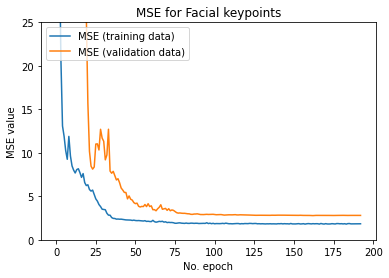

In [ ]:
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.ylim([0, 25])
plt.show()

# Creating model 3 as a custom CNN

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

BATCH_SIZE = 64
EPOCHS = 400

early_stop =  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=35, verbose=1, 
                           mode='auto', restore_best_weights=True)

reduce_lr =  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, 
                              verbose=1, mode='auto',min_lr=10e-10)

model3 = keras.models.Sequential()
    
model3.add(keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(keras.layers.Conv2D(32, (3,3), padding='same'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(keras.layers.Conv2D(16, (3,3), padding='same'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dense(64, activation='tanh'))
model3.add(Flatten())
model3.add(Dropout(0.25))
model3.add(keras.layers.Dense(30))

model3.compile(loss='mean_squared_error',  optimizer=tf.keras.optimizers.Adam(), metrics=['mean_squared_error'])

history = model3.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test, y_test),
    shuffle=True,
    verbose=1,
    callbacks=[reduce_lr, early_stop]
)

Epoch 1/400
21/21 [==============================] - 2s 61ms/step - loss: 483.3058 - mean_squared_error: 483.3058 - val_loss: 36.6480 - val_mean_squared_error: 36.6480 - lr: 0.0010
Epoch 2/400
21/21 [==============================] - 1s 45ms/step - loss: 20.9535 - mean_squared_error: 20.9535 - val_loss: 13.5074 - val_mean_squared_error: 13.5074 - lr: 0.0010
Epoch 3/400
21/21 [==============================] - 1s 44ms/step - loss: 12.4395 - mean_squared_error: 12.4395 - val_loss: 10.7191 - val_mean_squared_error: 10.7191 - lr: 0.0010
Epoch 4/400
21/21 [==============================] - 1s 44ms/step - loss: 11.6249 - mean_squared_error: 11.6249 - val_loss: 10.8813 - val_mean_squared_error: 10.8813 - lr: 0.0010
Epoch 5/400
21/21 [==============================] - 1s 44ms/step - loss: 11.5172 - mean_squared_error: 11.5172 - val_loss: 10.6405 - val_mean_squared_error: 10.6405 - lr: 0.0010
Epoch 6/400
21/21 [==============================] - 1s 45ms/step - loss: 11.5944 - mean_squared_error:

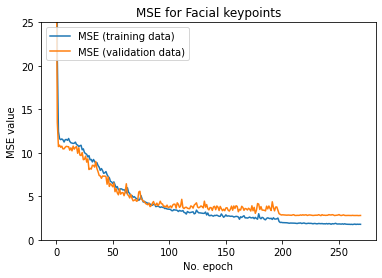

In [ ]:
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.ylim([0, 25])
plt.show()

# Evaluating final model

In [ ]:
model = model3

In [ ]:
import sklearn.metrics

def get_predictions(model, X_test, y_test):
    test_predict = model.predict(X_test)
    test_predict
    test_predict = test_predict
    mse_test = sklearn.metrics.mean_squared_error(test_predict, y_test)
    print("MSE dla test:", mse_test)
    return test_predict


def evaluate_model(model, test_prediction):
  y_predicted = []
  for i in range(len(test_prediction)):
    j=0
    array=[]
    while j < 30:
      [x, y] = [test_prediction[i][j], test_prediction[i][j+1]]
      j+=2
      array.append([x, y])
    y_predicted.append(array)
  return y_predicted

# Testing with test part from the dataset

MSE dla test: 2.7793512236449014


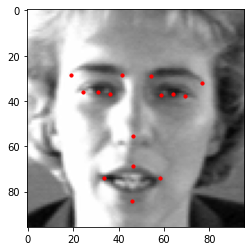

In [ ]:
test_prediction = get_predictions(model, X_test, y_test)
y_predicted = evaluate_model(model, test_prediction)
display_image_keypoints(1, X_test_without_reshape , np.array(y_predicted))

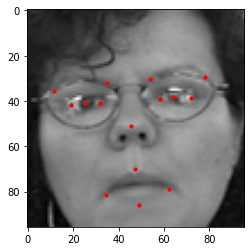

In [ ]:
display_image_keypoints(2, X_test_without_reshape , np.array(y_predicted))

# Saving final model

In [ ]:
#model.save(base_path + 'keypoints_model')

In [ ]:
loaded_keypoints_model = keras.models.load_model(base_path + 'keypoints_model')

#Test with new images (not from the dataset)

In [ ]:
! pip install image_to_numpy

  Created wheel for image-to-numpy: filename=image_to_numpy-1.0.0-py3-none-any.whl size=3472 sha256=3172e1d40abb0213edb169978f67bcb41ce8370690957d8bd9756455710020e4
  Stored in directory: /root/.cache/pip/wheels/74/e9/26/d0d709d7c1270fe1779553e4ee01ff0e56c99988c229b47ae8
Successfully built image-to-numpy


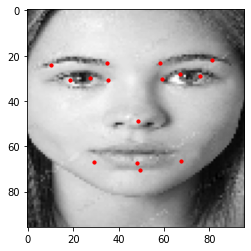

In [ ]:
import image_to_numpy
import cv2

img = image_to_numpy.load_image_file("face.jfif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_for_pred = cv2.resize(gray, (96,96), interpolation = cv2.INTER_CUBIC)

img_for_pred = img_for_pred.reshape(-1, 96,96)
test_prediction = loaded_keypoints_model.predict([img_for_pred])

y_predicted = evaluate_model(loaded_keypoints_model, test_prediction)
display_image_keypoints(0, img_for_pred , np.array(y_predicted))

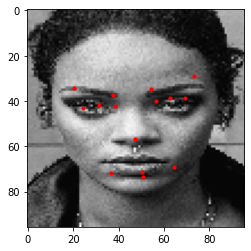

In [ ]:
img = image_to_numpy.load_image_file("face2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_for_pred = cv2.resize(gray, (96,96))

img_for_pred = img_for_pred.reshape(-1, 96,96)
test_prediction =  loaded_keypoints_model.predict([img_for_pred])

y_predicted = evaluate_model( loaded_keypoints_model, test_prediction)
display_image_keypoints(0, img_for_pred , np.array(y_predicted))

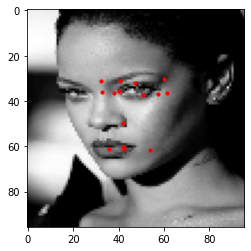

In [ ]:
img = image_to_numpy.load_image_file("face3.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_for_pred = cv2.resize(gray, (96,96))

img_for_pred = img_for_pred.reshape(-1, 96,96)
test_prediction = loaded_keypoints_model.predict([img_for_pred])

y_predicted = evaluate_model(loaded_keypoints_model, test_prediction)
display_image_keypoints(0, img_for_pred , np.array(y_predicted))